# Machine Learning Techniques (CSE6024) Cycle Sheet-2

<h2>ANKITA SINHA (20MCI0003)</h2>

<p><b>Libraries used:</b> numpy, pandas and matplotlib.pyplot </p>
<p><b> Dataset used:</b> winequality.csv</p>
<h2> ID3 Decision Tree Program</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("winequality.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
print(df.shape)

(4898, 12)


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [11]:
facidity_mean = df["fixed acidity"].mean()
vacidity_mean =df["volatile acidity"].mean()
cacid_mean =df["citric acid"].mean()
alcohol_mean = df["alcohol"].mean()
rsugar_mean = df["residual sugar"].mean()
chlorides_mean = df["chlorides"].mean()
fsdioxide_mean = df["free sulfur dioxide"].mean()
tsdioxide_mean = df["total sulfur dioxide"].mean()
density_mean = df["density"].mean()
pH_mean = df["pH"].mean()
sulphates_mean = df["sulphates"].mean()
quality_mean = df["quality"].mean()

In [12]:
facidity = df["fixed acidity"]
vacidity =df["volatile acidity"]
cacid =df["citric acid"]
alcohol = df["alcohol"]
rsugar = df["residual sugar"]
chlorides = df["chlorides"]
fsdioxide = df["free sulfur dioxide"]
tsdioxide = df["total sulfur dioxide"]
density = df["density"]
pH = df["pH"]
sulphates = df["sulphates"]
quality = df["quality"]

In [13]:
parameter = ["fixed acidity", "volatile acidity", "citric acid","chlorides","density","quality","sulphates", "pH","free sulfur dioxide","alcohol","total sulfur dioxide","residual sugar"]
x_pos = np.arange(len(parameter))
Mean = [facidity_mean, vacidity_mean, cacid_mean,chlorides_mean,fsdioxide_mean,tsdioxide_mean,density_mean,pH_mean,sulphates_mean,quality_mean,alcohol_mean,rsugar_mean]

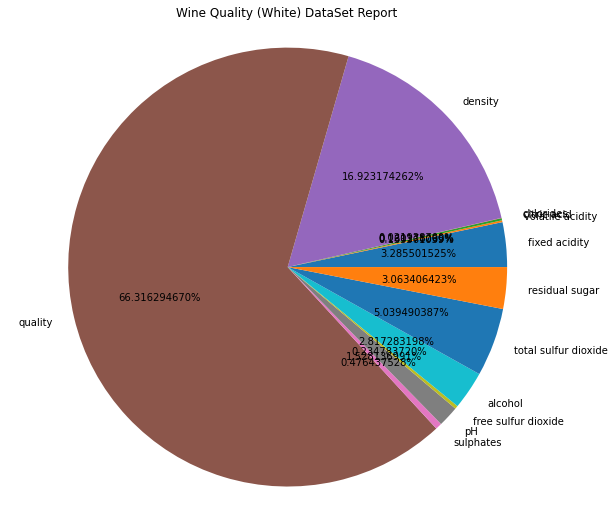

In [34]:
fig, ax = plt.subplots(figsize =(10, 9))
ax.pie(Mean, labels=parameter, autopct='%2.9f%%')
ax.axis('equal') # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Wine Quality (White) DataSet Report')
plt.show()

In [35]:
print(len(df)) 

4898


In [36]:
def find_entropy(df):
    Class = df.keys()[-1]
    entropy = 0
    vals = df[Class].unique() 
    for value in vals:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy

In [37]:
find_entropy(df)

1.8617149332355558

In [38]:
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]
    target_variables = df[Class].unique()
    variables = df[attribute].unique()  
    entropy1 = 0
    for var in variables:
        entropy = 0
        for tar_var in target_variables:
            num = len(df[attribute][df[attribute]==var][df[Class]==tar_var])
            den = len(df[attribute][df[attribute]==var])
            fraction = num/(den)
            if fraction==0:
                continue
            else:
                entropy += -fraction*np.log2(fraction)
        fraction2 = den/len(df)
        entropy1 += -fraction2*entropy
    return abs(entropy1)

In [39]:
print(find_entropy_attribute(df,"quality"))

0.0


In [40]:
list_entropy_attributes = [find_entropy_attribute(df,i) for i in df.columns[0:-1]] #entropy of all attributes except last one
print(list_entropy_attributes)

[1.7779472092002244, 1.7170189212283762, 1.7316361415554296, 1.5561190285348392, 1.6819039082128864, 1.6934849483640617, 1.5790717028356402, 1.1843142758760796, 1.7473434685832272, 1.7702553205215217, 1.5761803889781865]


In [41]:
def find_winner(df):
    ig = []
    for key in df.keys()[:-1]:
        ig.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(ig)]

In [42]:
print(find_winner(df))

density


In [43]:
def get_subtable(df,node,value):
    return df[df[node]==value].reset_index(drop=True)

In [46]:
def build_tree(df,tree=None):
    Class = df.keys()[-1]
    node = find_winner(df)

    att_val = np.unique(df[node]) 
    if tree is None:
        tree = {}
        tree[node] = {}
        for val in att_val:
            subtable = get_subtable(df,node,val)
            clValue,counts = np.unique(subtable["quality"],return_counts=True)
            if len(counts)==1:
                tree[node][val] = clValue[0]
            else:
                tree[node][val] = build_tree(subtable)
    return tree

In [47]:
t = build_tree(df)
import pprint
pprint.pprint(t)

{'density': {0.98711: 7,
             0.98713: 8,
             0.9872200000000001: 5,
             0.9874: 5,
             0.9874200000000001: 7,
             0.98746: 7,
             0.9875799999999999: 6,
             0.98774: 7,
             0.98779: 7,
             0.9879399999999999: 6,
             0.9880200000000001: 7,
             0.98815: 7,
             0.98816: 6,
             0.98819: 7,
             0.9882200000000001: 6,
             0.9882299999999999: 7,
             0.988245: 6,
             0.98834: 7,
             0.98836: {'fixed acidity': {5.9: 7, 6.6: 6}},
             0.9884: 6,
             0.98845: 6,
             0.9885299999999999: 7,
             0.98854: 6,
             0.98856: 8,
             0.9886: 6,
             0.98862: {'fixed acidity': {6.0: 6, 7.1: 8}},
             0.98865: 6,
             0.98867: 7,
             0.9886799999999999: 7,
             0.98869: 7,
             0.9887: {'fixed acidity': {5.0: 7, 5.8: 5}},
             0.988710000000